WEATHER PREDICTION - FORECASTING RAIN
=====================================
_Abarna V,_ 
_Karthik S_ 
-------------------------------------
***
- **AIM** - To Predict if Rain (or Precipitation) would be there tomorrow or not based on a set of parameters like Wind Gust Speed, Humidity, Evaporation Rate etc.

- **DATASET USED** - Daily Weather Observations, Bureau of Meteorology, Australia ([Link](http://www.bom.gov.au/climate/dwo/))

- **ABSTRACT** - The project focussses on predicting RainTomorrow, which is a Categorical Attribute in the Dataset (Yes/No), using Supervised Learning Algorithms. The following algorithms have been used for the same -

   1) Random Forest
   2) Support Vector Machine (SVM)
   3) Decision Tree
   4) Naive Bayes
   5) K Nearest Neighbours (KNN)

  The Analysis for each algorithm is done using a Confusion Matrix and Feature Importance Score

- **REFERENCES** -

  1) Kaggle ([link](https://www.kaggle.com/code/shreyasrinivasan30/ibm-weather-data/notebook))
  2) ChatGPT (_For Errors and Installing Libraries_)

## Getting the Prerequisites - Installing Necessary Libraries

For this project we are using the following libraries -
1) NumPy
2) Pandas
3) Scikit-learn
4) Seaborn
5) Matplotlib


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

In [5]:
pip install matplotlib

## Importing Necessary Libraries and Machine Learning Modules 

In [6]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



## Exploring the Dataset

In [7]:
# Load Dataset
df = pd.read_csv('Weather_Data.csv')

# Print Dataset Info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

## Handling NULL values and Converting Categorical Data to Numerical Format

In [9]:
# Handling Missing Values
print("Missing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)

# Encode Categorical Features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df.head())

Missing Values:
Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
   Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  1036     19.5     22.4      15.6          6.2       0.0           13   
1  1135     19.5     25.6       6.0          3.4       2.7           13   
2  1228     21.6     24.5       6.6          2.4       0.1           13   
3  1237     20.2     22.8      18.8          2.2       0.0           13   
4  1246     19.7     25.7      77.4          4.8       0.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41           

## Defining Features and Target and Splitting the Dataset for Training and Testing

In [10]:
# Define Features and Target Variable
X = df.drop(columns=['RainTomorrow']) 
y = df['RainTomorrow']

# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling To Reduce Bias and Reducing the Impact of Outliers

In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Defining the Models

In [12]:
# Dictionary to store models and their names
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

## Training and Testing the Models followed by Accuracy Evaluation


Training Random Forest Model...
Accuracy of Random Forest: 0.8198
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       476
           1       0.74      0.53      0.61       179

    accuracy                           0.82       655
   macro avg       0.79      0.73      0.75       655
weighted avg       0.81      0.82      0.81       655



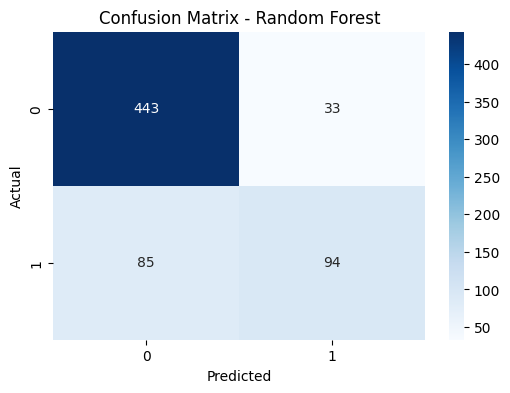


Training SVM Model...
Accuracy of SVM: 0.8137
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       476
           1       0.74      0.50      0.59       179

    accuracy                           0.81       655
   macro avg       0.78      0.71      0.74       655
weighted avg       0.81      0.81      0.80       655



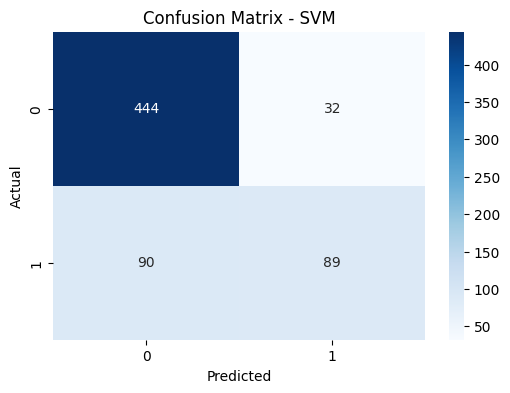


Training Decision Tree Model...
Accuracy of Decision Tree: 0.7649
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       476
           1       0.57      0.56      0.57       179

    accuracy                           0.76       655
   macro avg       0.70      0.70      0.70       655
weighted avg       0.76      0.76      0.76       655



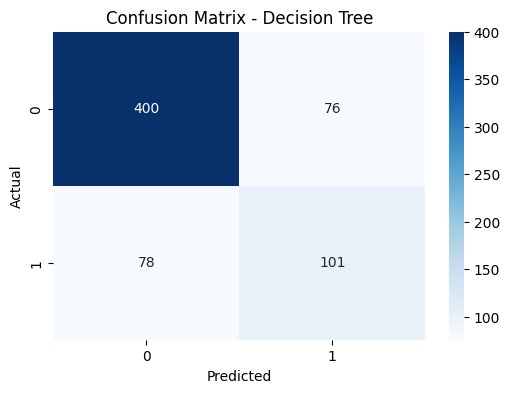


Training Naïve Bayes Model...
Accuracy of Naïve Bayes: 0.7969
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       476
           1       0.62      0.68      0.65       179

    accuracy                           0.80       655
   macro avg       0.75      0.76      0.75       655
weighted avg       0.80      0.80      0.80       655



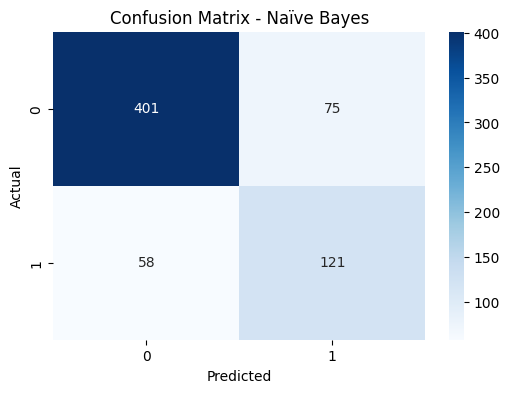


Training KNN Model...
Accuracy of KNN: 0.7893
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       476
           1       0.66      0.48      0.55       179

    accuracy                           0.79       655
   macro avg       0.74      0.69      0.71       655
weighted avg       0.78      0.79      0.78       655



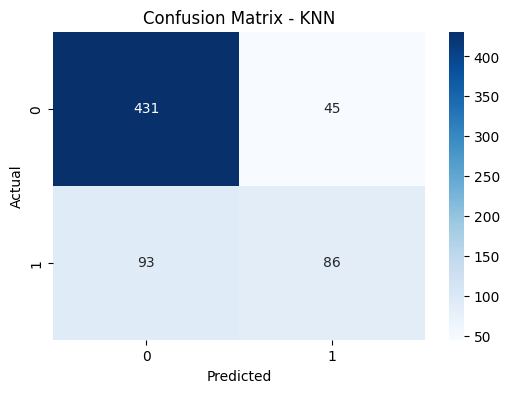

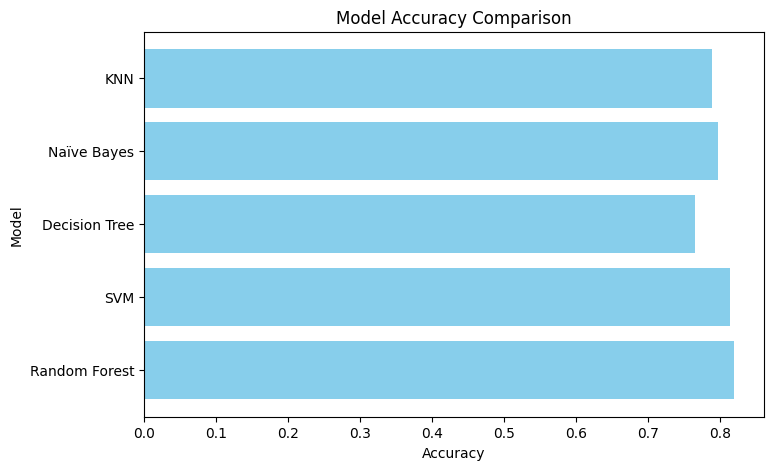

In [13]:
# Train and Evaluate Each Model
accuracy_scores = {}

for name, model in models.items():
    print(f"\nTraining {name} Model...")
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)  # Make Predictions
    
    # Model Evaluation
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    
    print(f"Accuracy of {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Compare Model Accuracies
plt.figure(figsize=(8, 5))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.show()

## Checking Feature Importance for Further Improvement

C:\Users\KARTHIK-LAPTOP\AppData\Local\Temp\ipykernel_12164\3833837140.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


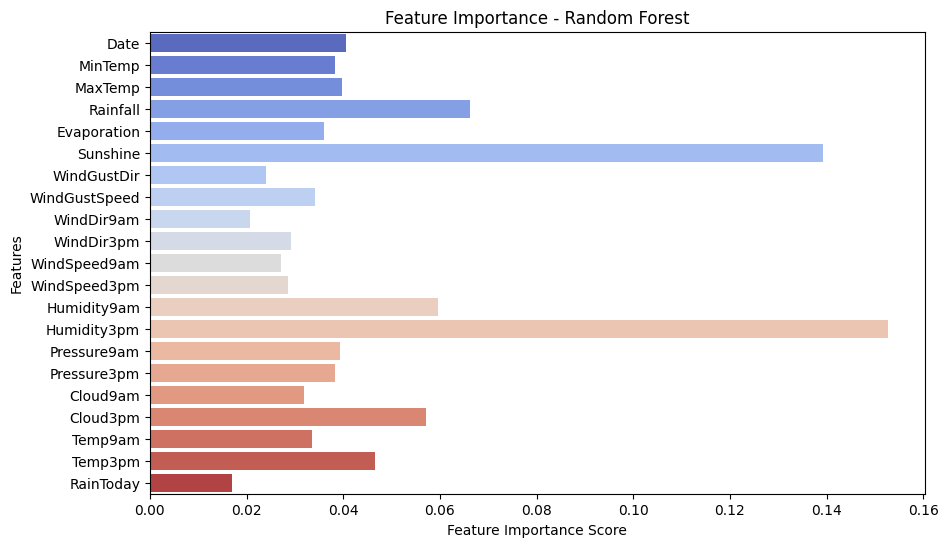

C:\Users\KARTHIK-LAPTOP\AppData\Local\Temp\ipykernel_12164\3833837140.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


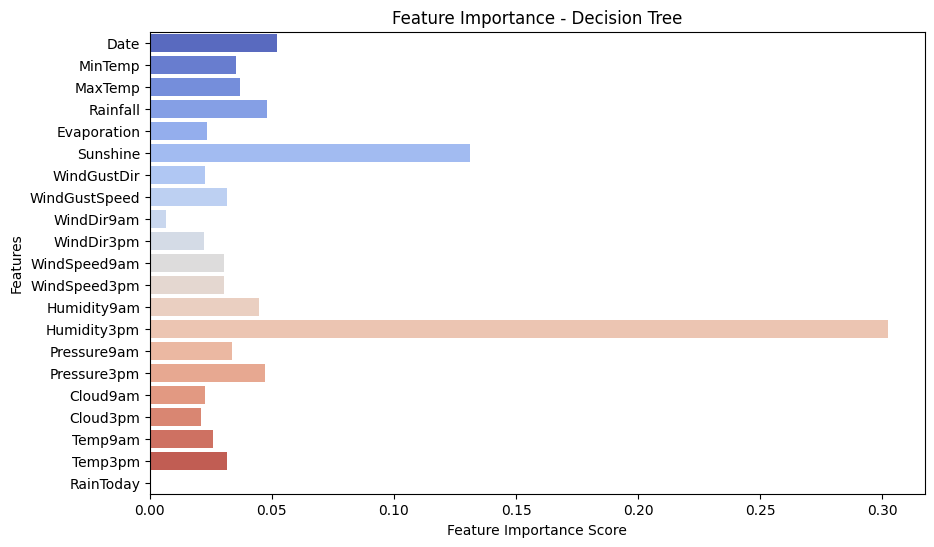

In [14]:
# Extract Feature Importance for Models
for name, model in models.items():
    if hasattr(model, "feature_importances_"):  # Check if model supports feature importance
        importances = model.feature_importances_
        feature_names = X.columns

        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=feature_names, palette="coolwarm")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Features")
        plt.title(f"Feature Importance - {name}")
        plt.show()


## Conclusion

According to the Accuracy Scores Obtained in the Classification Report of the respective models, it is found that the Random Forest Classifier has the highest accuracy of a little above 0.8 out of 1. 

Thus, we conclude that Random Forest is the most suitable model for the given aim and dataset.

Thank you !!!